In [135]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [136]:
df_data_path = r'fcc-forum-pageviews.csv'
df = pd.read_csv(df_data_path, index_col='date', parse_dates=True)

df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


----
### Page View Time Series Visualizer
For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:
- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
- Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
- Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [138]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

filter = (df['value'] < df['value'].quantile(0.975)) & (df['value'] > df['value'].quantile(0.025))

df = df.loc[filter]

(Text(0.5, 0, 'Date'), Text(0, 0.5, 'Page Views'))

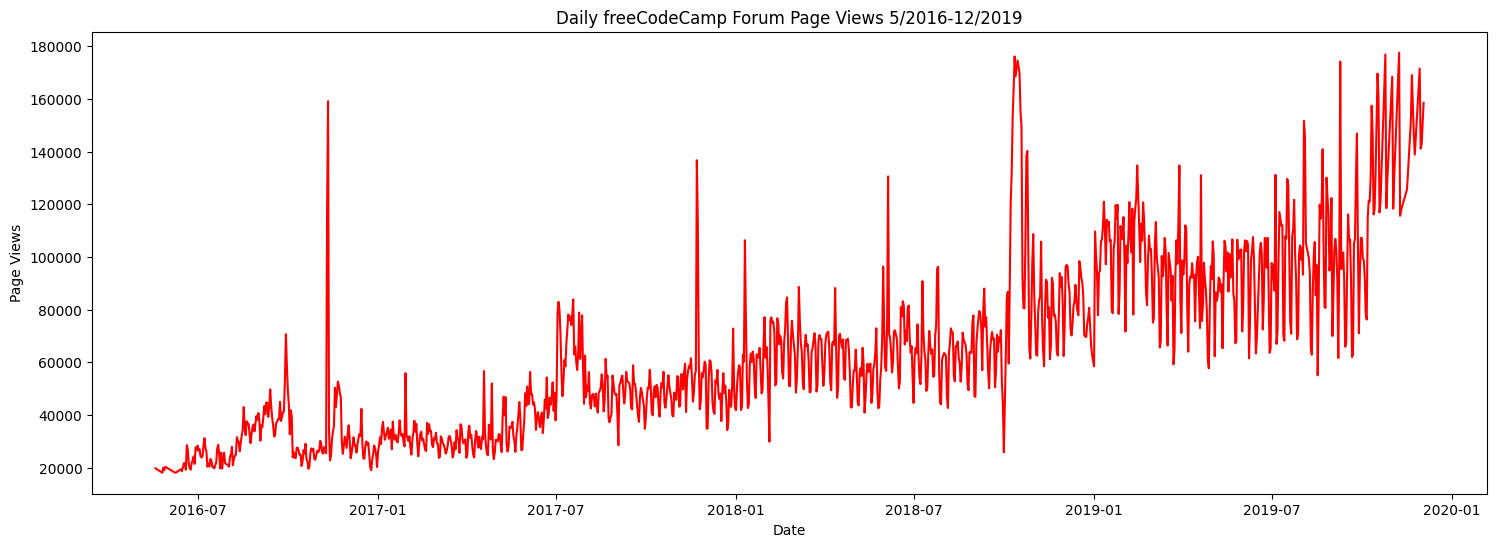

In [142]:
# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".
plt.figure(figsize=(18,6))
sns.lineplot(df, legend=False, palette=['r'])

plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date'), plt.ylabel('Page Views')

(Text(0.5, 0, 'Years'), Text(0, 0.5, 'Average Page Views'))

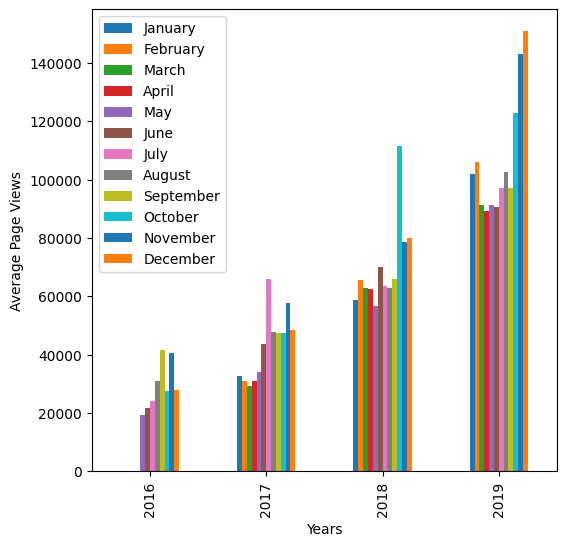

In [140]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png".
df_barplot = df.copy()

df_barplot['year'] = df_barplot.index.year
df_barplot['month'] = df_barplot.index.month

df_barplot = df_barplot.groupby(['year', 'month'])['value'].mean()
df_barplot = df_barplot.unstack()
df_barplot.columns = 'January February March April May June July August September October November December'.split()

df_barplot.plot(kind='bar', figsize=(6,6))
plt.xlabel('Years'), plt.ylabel('Average Page Views')

In [201]:
# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
df_boxplot = df.copy()

df_boxplot['year'] = df_boxplot.index.year
df_boxplot['month'] = [date.strftime('%b') for date in df_boxplot.index]

(Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 (0.0, 200000.0))

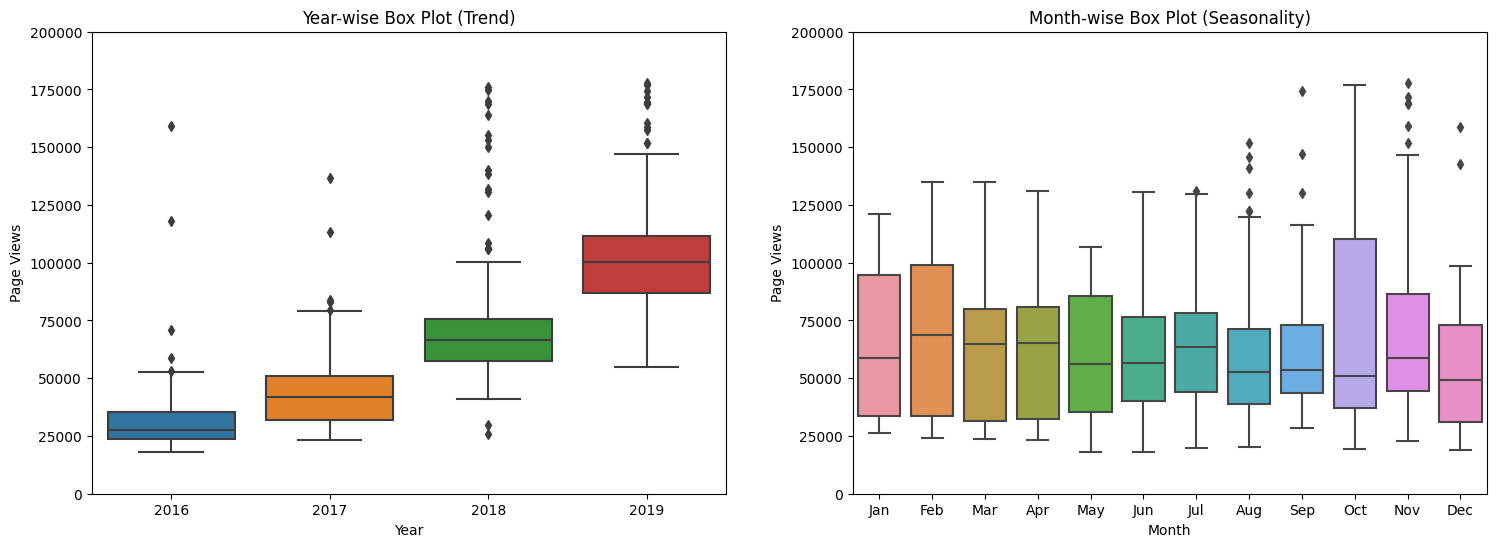

In [205]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

ax1 = sns.boxplot(df_boxplot, x='year', y='value', ax=ax1)
ax2 = sns.boxplot(df_boxplot, x='month', y='value', ax=ax2, order='Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec'.split())

ax1.set_title('Year-wise Box Plot (Trend)'), ax1.set_xlabel('Year'), ax1.set_ylabel('Page Views'), ax1.set_ylim((0, 2e5))
ax2.set_title('Month-wise Box Plot (Seasonality)'), ax2.set_xlabel('Month'), ax2.set_ylabel('Page Views'), ax2.set_ylim((0, 2e5))